# 손글씨 예제

In [20]:
# 파일 열기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

데이터 탐색

In [3]:
# 훈련 데이터 사이즈
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# 테스트 데이터 사이즈
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

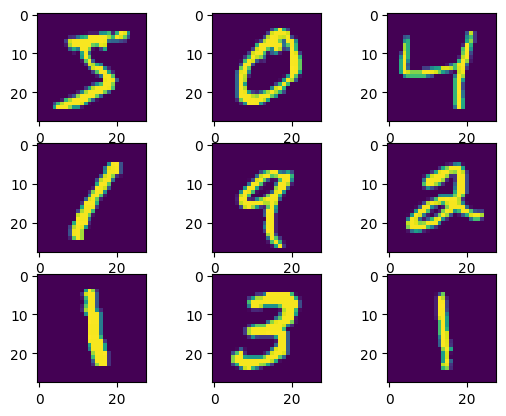

In [8]:
# 훈련 데이터 이미지 확인 (처음 9개)
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()

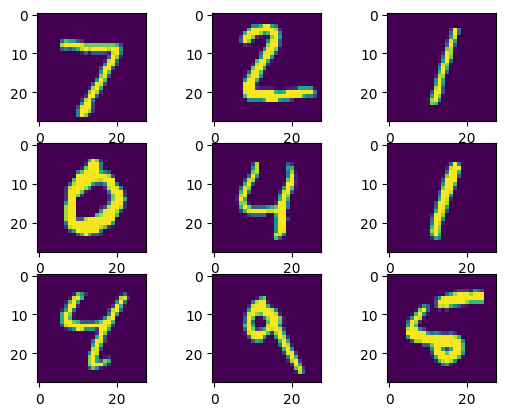

In [10]:
# 테스트 데이터 이미지 확인 (처음 9개)
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
plt.show()

데이터 전처리

In [21]:
# 형태변환
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [22]:
# 라벨 인코딩
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

모델링

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 구조 확인

In [24]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 7.5 MB/s eta 0:00:00


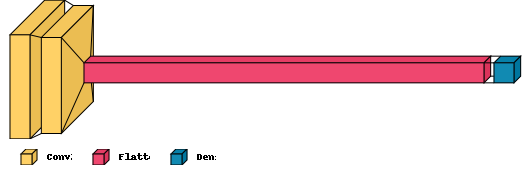

In [26]:
import visualkeras
visualkeras.layered_view(model, legend=True)

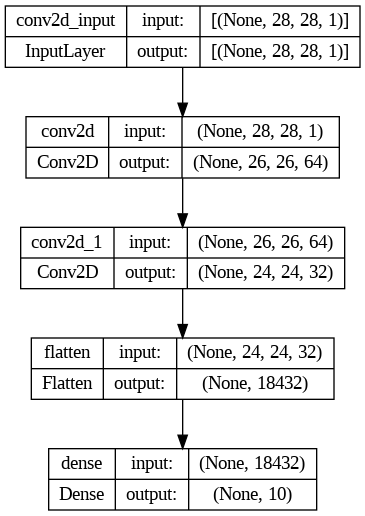

In [27]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [28]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 217s 115ms/step - loss: 0.3111 - accuracy: 0.9505 - val_loss: 0.1010 - val_accuracy: 0.9702
Epoch 2/3
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0709 - accuracy: 0.9789 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0829 - val_accuracy: 0.9769


In [30]:
# 모델 평가
score = model.evaluate(x_test, y_test)
print('accuracy:', score[0])
print('loss:', score[1])

313/313 [==============================] - 10s 31ms/step - loss: 0.0829 - accuracy: 0.9769
accuracy: 0.08291707187891006
loss: 0.9768999814987183


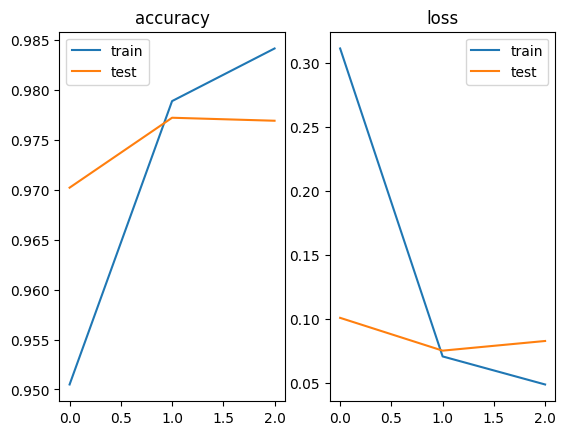

In [31]:
# 히스토리 그래프
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.title('accuracy')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

313/313 [==============================] - 11s 34ms/step


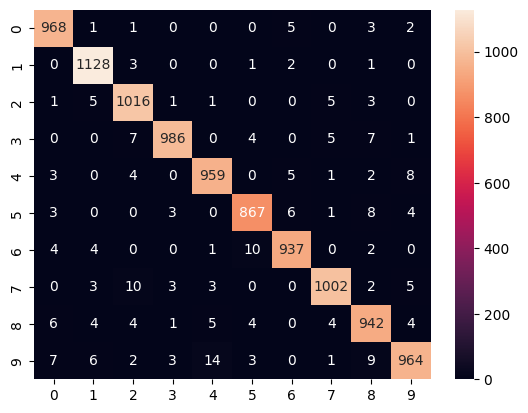

In [33]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [34]:
# 분류리포트
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [42]:
# 테스트 데이터 준비
from PIL import Image

test_data = Image.open('/content/three.png')
test_data = test_data.convert('L')
test_data = np.asarray(test_data)
test_data = test_data.reshape(1,28,28,1)
test_data

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

In [44]:
# 테스트 데이터로 예측
np.argmax(model.predict(test_data), axis=1)

1/1 [==============================] - 0s 34ms/step


array([3])